In [139]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', family = 'Arial')
# read in results
path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\final_results.csv"
data = pd.read_csv(path)

## Concentration boxplots

In [89]:
comps_path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\TableS1_sample_compositions.xlsx"
mhc_comps = pd.read_excel(comps_path, sheet_name='MHC')
lanl_comps = pd.read_excel(comps_path, sheet_name='LANL')

# remove units
mhc_comps.columns = mhc_comps.columns.str.strip(' (wt%)| (ppm)')
lanl_comps.columns = lanl_comps.columns.str.strip(' (wt%)| (ppm)')

# subsect into majors and minors
majors = ('SiO2|MnO|Na2O')
maj_mhc = mhc_comps.loc[:,mhc_comps.columns.str.contains(majors)]
maj_lanl = lanl_comps.loc[:,lanl_comps.columns.str.contains(majors)]
min_mhc = mhc_comps.loc[:,~mhc_comps.columns.str.contains(majors+'|Sample')]
min_lanl = lanl_comps.loc[:,~lanl_comps.columns.str.contains(majors+'|Sample')]

#### Prepare boxplot data and formatting

In [146]:
maj_ticks = maj_mhc.columns
min_ticks = min_mhc.columns

maj_lanl_data = []
min_lanl_data = []
maj_mhc_data = []
min_mhc_data = []

# define colors and fontsizes for the rest of the document here
c_l = 'navy'
c_m = 'goldenrod'
llabel = 'LANL (ChemCam)'
mlabel = 'MHC (ChemLIBS)'
ysize = 12
lsize = 14
tsize = 16
klen = 5

# get outlier vals to later remove
out_elem = ['Na2O', 'MnO', 'Li', 'Ni', 'Pb', 'Rb', 'Sr', 'Zn']
out_vals = [15, 15, 285, 577, 219, 354, 739, 448]
outliers = pd.DataFrame({
        'element' : out_elem,
        'outlier' : out_vals
})

# get data in right format
for element in maj_ticks:
    if element == 'SiO2':
        maj_lanl_df = maj_lanl[element].dropna().tolist()   
        maj_lanl_data.append(maj_lanl_df)
        maj_mhc_df = maj_mhc[element].dropna().tolist()
        maj_mhc_data.append(maj_mhc_df)
    
    else:
        maj_lanl_df = maj_lanl[element].dropna().tolist()
        maj_mhc_df = maj_mhc[element].dropna().tolist()

        outlier = outliers[outliers['element'] == element]['outlier'].iloc[0]
        maj_lanl_df = [i for i in maj_lanl_df if i <= outlier]
        maj_mhc_df = [i for i in maj_mhc_df if i <= outlier]

        maj_lanl_data.append(maj_lanl_df)
        maj_mhc_data.append(maj_mhc_df)
    
for element in min_ticks:
    min_lanl_df = min_lanl[element].dropna().tolist()
    min_mhc_df = min_mhc[element].dropna().tolist()
        
    outlier = outliers[outliers['element'] == element]['outlier'].iloc[0]
    min_lanl_df = [i for i in min_lanl_df if i <= outlier]
    min_mhc_df = [i for i in min_mhc_df if i <= outlier]
    
    min_lanl_data.append(min_lanl_df)
    min_mhc_data.append(min_mhc_df)

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)
    
# set how outlier points look
flierprops = dict(marker='x', markeredgecolor='#c9c9c9', markersize=2)

#### Plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


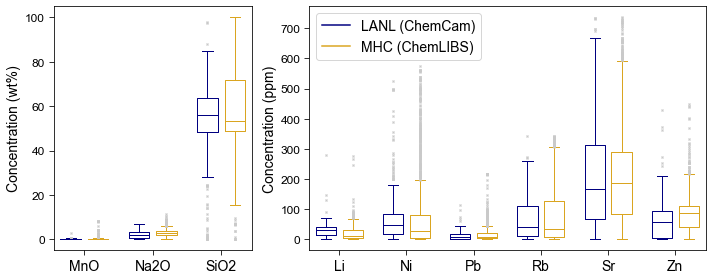

In [147]:
fig, (major, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                # make major one smaller
                                gridspec_kw={'width_ratios': [1,2]})

# box positions
maj_left_pos = np.array(range(len(maj_ticks)))*2.0-0.4
maj_right_pos = np.array(range(len(maj_ticks)))*2.0+0.4
min_left_pos = np.array(range(len(min_ticks)))*2.0-0.4
min_right_pos = np.array(range(len(min_ticks)))*2.0+0.4

# majors
bp_maj_lanl = major.boxplot(maj_lanl_data, flierprops=flierprops, positions = maj_left_pos, widths=0.6, showfliers=True)
bp_maj_mhc = major.boxplot(maj_mhc_data, flierprops=flierprops, positions = maj_right_pos, widths=0.6, showfliers=True)
set_box_color(bp_maj_lanl, c_l)
set_box_color(bp_maj_mhc, c_m)

# minors
bp_min_lanl = minor.boxplot(min_lanl_data, flierprops=flierprops, positions = min_left_pos, widths=0.6, showfliers=True)
bp_min_mhc = minor.boxplot(min_mhc_data, flierprops=flierprops, positions = min_right_pos, widths=0.6, showfliers=True)
set_box_color(bp_min_lanl, c_l)
set_box_color(bp_min_mhc, c_m)
 
# set plot labels
major.set_xticks(range(0, len(maj_ticks) * 2, 2))
major.set_xticklabels(maj_ticks, fontsize=lsize)
major.tick_params(axis = 'y', which = 'major', labelsize = ysize) 
major.set_ylabel('Concentration (wt%)', fontsize=lsize)
major.tick_params(length=klen)

minor.set_xticks(range(0, len(min_ticks) * 2, 2))
minor.set_xticklabels(min_ticks, fontsize=lsize)
minor.tick_params(axis = 'y', which = 'major', labelsize = ysize) 
minor.set_ylabel('Concentration (ppm)', fontsize=lsize)
minor.tick_params(length=klen)


plt.plot([], c=c_l, label=llabel)
plt.plot([], c=c_m, label=mlabel)
plt.legend(loc = 'best', fontsize=lsize)

plt.tight_layout()
plt.savefig('C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\comps_boxplot.eps')
plt.savefig('C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\comps_boxplot.jpg')
plt.show()

## Braga vs. metals
- ChemLIBS, Mars atmosphere
- LOQ and RMSE-P

In [140]:
data1 = data[(data.instrument == "ChemLIBS") & (data.atmosphere == "Mars")]
data1 = data1[['element', 'LOQ_Braga', 'LOQ_metals', 'RMSEP_Braga', 'RMSEP_metals']].reset_index(drop=True)

maj_list = ['MnO', 'Na2O', 'SiO2']
maj1 = pd.DataFrame(data1[data1.element.isin(maj_list)].reset_index(drop=True))
min1 = data1[~data1.element.isin(maj_list)].reset_index(drop=True)

### Bar plot

In [162]:
def braga_metals(lotype):
    
    # define variables
    braga = lotype + '_Braga'
    metals = lotype + '_metals'
    
    # define plot stuff
    width = 0.2
    c1 = '#3a2382'
    c2 = '#9588bf'

    #labels
    majlab = maj1.element
    minlab = min1.element

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    major1 = maj.bar(majt1, maj1[braga], width, label = "Braga", color = c1)
    major2 = maj.bar(majt2, maj1[metals], width, label = "metals", color = c2)
    # minors
    minor1 = minor.bar(mint1, min1[braga], width, label = "Braga", color = c1)
    minor2 = minor.bar(mint2, min1[metals], width, label = "metals", color = c2)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize,)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
    minor.tick_params(length=klen)
    minor.legend(handles = [major1, major2], fontsize = lsize)

    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\" + lotype + '_Braga_metals.eps'
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\" + lotype + '_Braga_metals.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


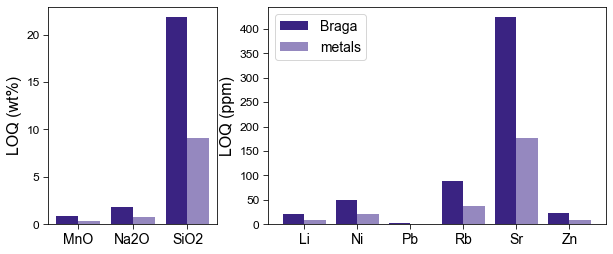

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


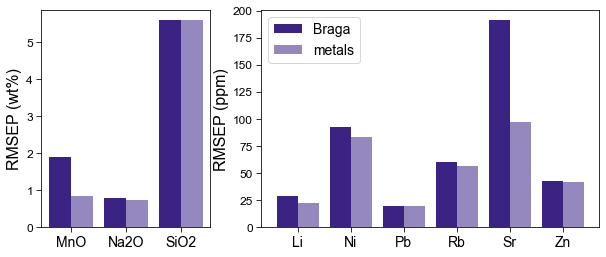

In [163]:
# make plots
braga_metals("LOQ")
braga_metals("RMSEP")

## LANL vs MHC
- Braga
- colors diff b/w instruments
- add data points for RMSE-P from Clegg
- X (RMSE) vs Y (R2) plot for CL/CC

In [151]:
data2 = data[data.atmosphere == "Mars"]
data2 = data2[['element', 'instrument', 'Avg_Braga', 'RMSEP_Braga', 'R2_Braga', 'LOQ_Braga']].reset_index(drop=True)
data2['RMSEP_per'] = round(((data2.RMSEP_Braga / data2.Avg_Braga) * 100), 1)

maj2 = data2[data2.element.isin(maj_list)].reset_index(drop=True)
min2 = data2[~data2.element.isin(maj_list)].reset_index(drop=True)
ldata = data2[data2.instrument == "LANL"].reset_index(drop=True)
mdata = data2[data2.instrument == "ChemLIBS"].reset_index(drop=True)

### Bar chart

In [167]:
def inst_maj(inst, lotype):
    return maj2[maj2.instrument==inst][lotype].reset_index(drop=True)
    
def inst_min(inst, lotype):
    return min2[min2.instrument==inst][lotype].reset_index(drop=True)

def mhc_lanl(lotype):
    data = lotype + '_Braga'
    
    # define plot stuff
    width = 0.2
    ysize = 12
    lsize = 14
    tsize = 16

    #labels
    majlab = maj1.element
    minlab = min1.element

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})

    # majors
    major1 = maj.bar(majt1, inst_maj('LANL', data), width, label = llabel, color = c_l)
    major2 = maj.bar(majt2, inst_maj('ChemLIBS', data), width, label = mlabel, color = c_m)
    # minors
    minor1 = minor.bar(mint1, inst_min('LANL', data), width, label = llabel, color = c_l)
    minor2 = minor.bar(mint2, inst_min('ChemLIBS', data), width, label = mlabel, color = c_m)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize, length=klen)  
    minor.tick_params(length=klen)
    minor.legend(handles = [major1, major2], fontsize = lsize)

    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\" + lotype + '_LANL_MHC.eps'
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\" + lotype + '_LANL_MHC.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show() 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


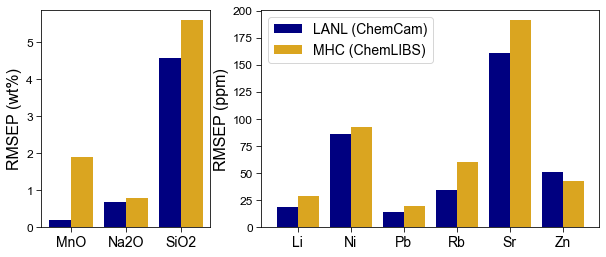

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


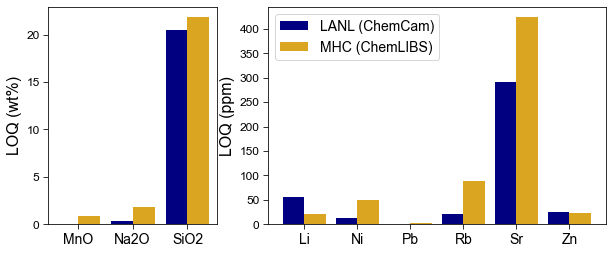

In [168]:
mhc_lanl('RMSEP')
mhc_lanl('LOQ')

### XY plot

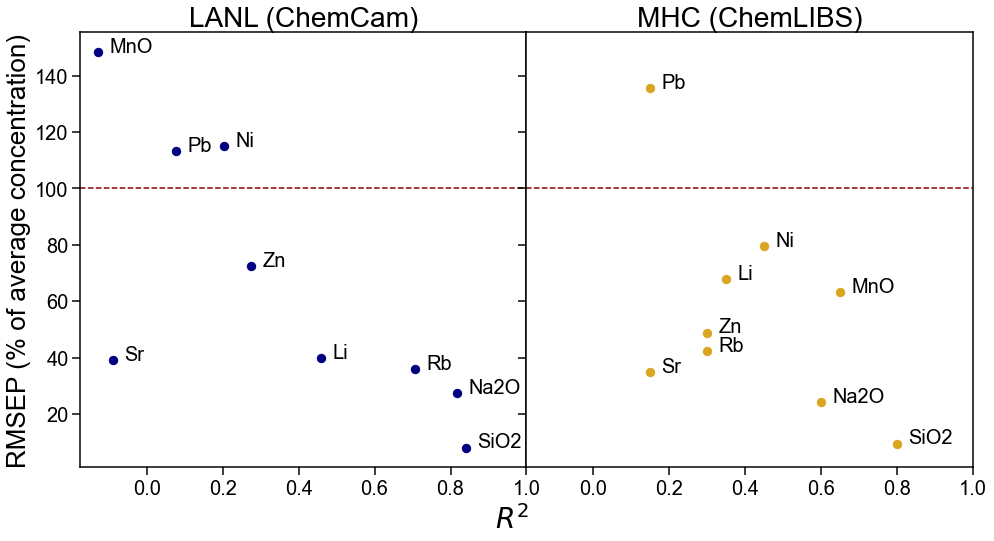

In [154]:
# def inst_compare(instrument):
fig, (lanl, mhc) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex = True, figsize = (16,8))

#sizes
labsize = 26
titlesize = 28
lwidth = 1.5
annot = 20
p_s = 70
    
lanl.scatter(x = ldata.R2_Braga, y = ldata.RMSEP_per, c=c_l, s=p_s)
lanl.set_xlim(right=1)
lanl.tick_params(labelsize=annot, width =lwidth, length = tlen)
lanl.set_ylabel("RMSEP (% of average concentration)", fontsize = labsize)
lanl.set_title(llabel, fontsize = titlesize)
lanl.axhline(y=100, xmin = 0, xmax = 1, color="darkred", linewidth=lwidth, linestyle = '--')

mhc.scatter(x = mdata.R2_Braga, y = mdata.RMSEP_per, c=c_m, s=p_s)
mhc.set_title(mlabel, fontsize = titlesize)
mhc.tick_params(labelsize=annot, width =lwidth, length = tlen)
mhc.axhline(y=100, xmin = 0, xmax = 1, color="darkred", linewidth=lwidth, linestyle = '--')

# add labels
for i in range(len(mdata.element)):
    mhc.text(mdata['R2_Braga'][i]+.03, mdata['RMSEP_per'][i]+.03, mdata['element'][i], fontsize=annot)

for i in range(len(ldata.element)):
    lanl.text(ldata['R2_Braga'][i]+.03, ldata['RMSEP_per'][i]+.03, ldata['element'][i], fontsize=annot)

# x axis label
fig.text(0.5, 0.02, r"$R^{2}$", ha = "center", fontsize = titlesize)

plt.subplots_adjust(wspace = 0, hspace =0)
plt.setp(mhc.spines.values(), linewidth=lwidth)
plt.setp(lanl.spines.values(), linewidth=lwidth)

# save image
path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\CC_CL_XY.eps"
path1 = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\CC_CL_XY.jpeg"
plt.savefig(path, bbox_inches="tight") # save as .eps
plt.savefig(path1, bbox_inches="tight") # save as .jpeg

plt.show()

## compare among atmospheres
- Braga
- ChemLIBS
- LOQ and RMSE-P

In [159]:
data3 = data[data.instrument == 'ChemLIBS']
data3 = data3[['element', 'atmosphere', 'RMSEP_Braga', 'LOQ_Braga']].reset_index(drop=True)

maj3 = data3[data3.element.isin(maj_list)].reset_index(drop=True)
min3 = data3[~data3.element.isin(maj_list)].reset_index(drop=True)

In [169]:
def maj_atm(atm, lotype):
    return maj3[maj3.atmosphere==atm][lotype]
    
def min_atm(atm, lotype):
    return min3[min3.atmosphere==atm][lotype]
    
def atmosphere(lotype):
    data = lotype + '_Braga'
    
    # define plot stuff
    width = 0.14
    c_m = '#a8261d'
    c_e = '#34a9c7'
    c_v = '#757778'
    ysize = 12
    lsize = 14
    tsize = 16

    #labels
    majlab = maj3.element.unique()
    minlab = min3.element.unique()

    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    majt3 = [x + width*2 for x in majt1]
    
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    mint3 = [x + width*2 for x in mint1]
    
    majtk = [x + width for x in majt1]
    mintk = [x + width for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,4),
                                     # make major one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    major1 = maj.bar(majt1, maj_atm('Mars', data), width, label = "Mars", color = c_m)
    major2 = maj.bar(majt2, maj_atm('Earth', data), width, label = "Earth", color = c_e)
    major3 = maj.bar(majt3, maj_atm('Vacuum', data), width, label = "Vacuum", color = c_v)
    # minors
    minor1 = minor.bar(mint1, min_atm('Mars', data), width, label = "Mars", color = c_m)
    minor2 = minor.bar(mint2, min_atm('Earth', data), width, label = "Earth", color = c_e)
    monir3 = minor.bar(mint3, min_atm('Vacuum', data), width, label = "Vacuum", color = c_v)

    # formatting
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.tick_params(length=klen)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)
    maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
    minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
    minor.tick_params(length=klen)
    minor.legend(handles = [major1, major2, major3], fontsize = lsize)

    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\"+lotype+"_atmosphere.eps"
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Darby Work\\LOD paper\\figures\\"+lotype+"_atmosphere.jpeg"
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


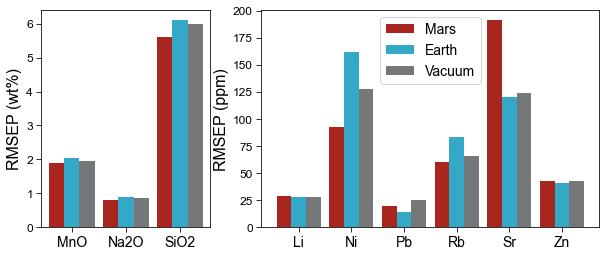

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


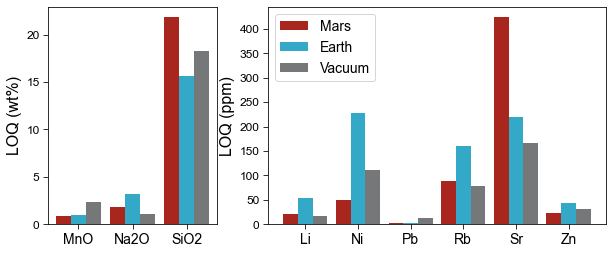

In [170]:
atmosphere('RMSEP')
atmosphere('LOQ')